In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn import model_selection 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.svm import SVC, LinearSVC 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pickle

In [2]:
features_train = pickle.load(open('features_train', 'rb'))
labels_train = pickle.load(open('labels_train', 'rb'))
print(len(features_train), len(labels_train))

4320 4320


In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features_train, labels_train, test_size=0.2, random_state=42)

In [4]:
clf = LinearSVC(C=1.0, loss='squared_hinge', 
                penalty='l2', multi_class='ovr')
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
def plot_confusion_matrix(y_true,y_pred): 
	cm_array = confusion_matrix(y_true,y_pred) 
	true_labels = np.unique(y_true) 
	pred_labels = np.unique(y_pred) 
	plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues) 
	plt.title("Confusion matrix", fontsize=16) 
	cbar = plt.colorbar(fraction=0.046, pad=0.04) 
	cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12) 
	xtick_marks = np.arange(len(true_labels)) 
	ytick_marks = np.arange(len(pred_labels)) 
	plt.xticks(xtick_marks, true_labels, rotation=90) 
	plt.yticks(ytick_marks,pred_labels) 
	plt.tight_layout() 
	plt.ylabel('True label', fontsize=14) 
	plt.xlabel('Predicted label', fontsize=14) 
	fig_size = plt.rcParams["figure.figsize"] 
	fig_size[0] = 12 
	fig_size[1] = 12 
	plt.rcParams["figure.figsize"] = fig_size 

In [7]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 70.1%


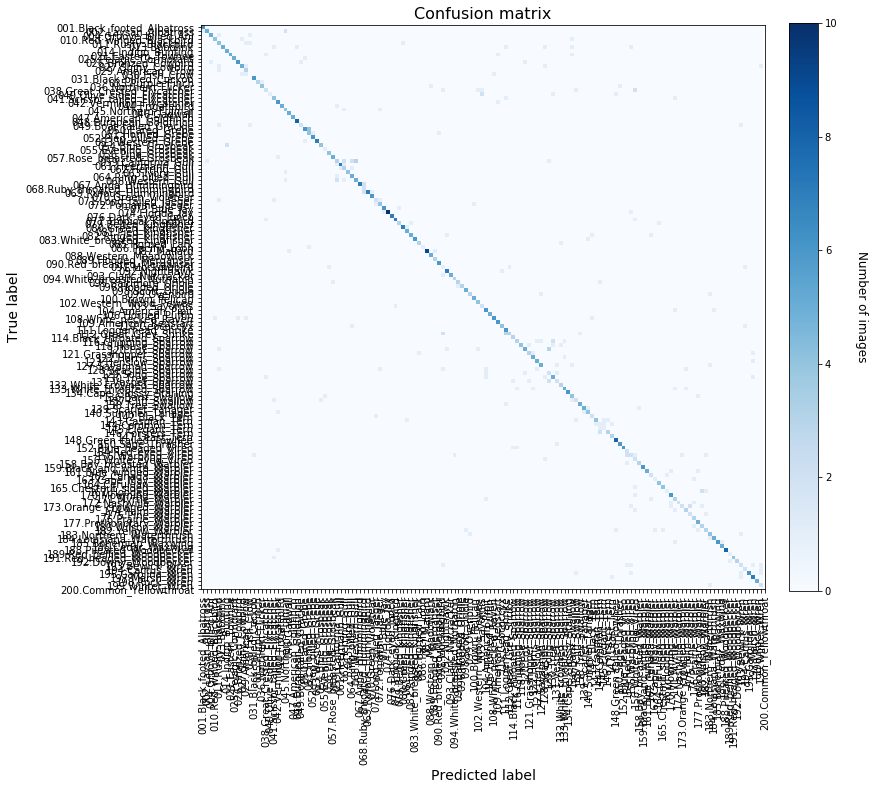

In [9]:
plot_confusion_matrix(y_test,y_pred)

# Predict test

First, retrain with all the training data - ok, as long as we're not using it to set hyperparameters or evaluate internal accuracy.

In [10]:
clf = LinearSVC(C=1.0, loss='squared_hinge', 
                penalty='l2', multi_class='ovr')
clf.fit(features_train, labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [32]:
# sanity check - how well do we do on the data on which we trained
print("Accuracy: {0:0.1f}%".format(accuracy_score(labels_train,clf.predict(features_train))*100))

Accuracy: 100.0%


In [11]:
features_test = pickle.load(open('features_test', 'rb'))
len(features_test)

4320

In [12]:
test_pred = clf.predict(features_test)
test_pred.shape

(4320,)

In [13]:
test_pred[:3]

array(['050.Eared_Grebe', '147.Least_Tern', '072.Pomarine_Jaeger'], 
      dtype='<U29')

In [15]:
test_pred[1].split('.')[0]

'147'

In [18]:
list(range(1,len(features_test)+1))[-3:]

[4318, 4319, 4320]

In [28]:
test_results_for_output = pd.DataFrame({
    'Id': range(1,len(features_test)+1),
    'Prediction': pd.Series(test_pred).apply(lambda pred: pred.split('.')[0].strip('0'))
})
test_results_for_output.shape

(4320, 2)

In [29]:
test_results_for_output[:3]

,Id,Prediction
0,1,5
1,2,147
2,3,72


In [31]:
test_results_for_output.to_csv('test.csv', index=False)

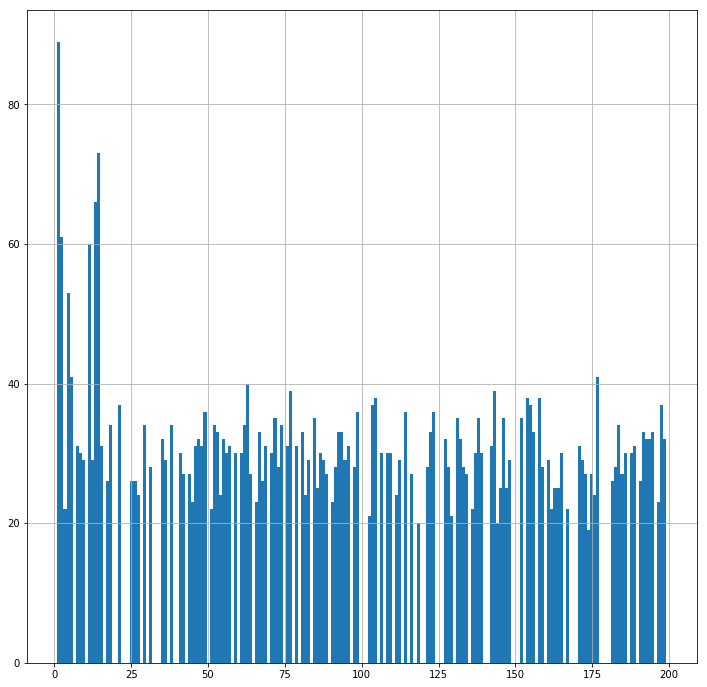

In [49]:
test_results_for_output['Prediction'].astype(int).hist(bins=200)

In [53]:
len(set(labels_train))

144

In [55]:
len(test_results_for_output['Prediction'].unique())

137

In [56]:
test_results_for_output['Prediction'].value_counts(dropna=False)

1      89
14     73
13     66
2      61
11     60
4      53
5      41
177    41
63     40
143    39
77     39
104    38
158    38
154    38
103    37
198    37
21     37
155    37
123    36
49     36
99     36
114    36
138    35
146    35
85     35
131    35
152    35
72     35
18     34
38     34
       ..
25     26
17     26
68     26
26     26
191    26
182    26
145    25
164    25
86     25
163    25
147    25
27     24
82     24
111    24
176    24
54     24
197    23
45     23
66     23
91     23
167    22
136    22
162    22
3      22
51     22
129    21
102    21
118    20
144    20
174    19
Name: Prediction, dtype: int64